# Diminos Store - Delivery Time

* Problem Statement : 
Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 


## Importing Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Importing DataFrame

In [2]:
df = pd.read_csv("diminos_data.csv")

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df.tail()

,order_id,order_placed_at,order_delivered_at
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311


In [6]:
# We dont need order_id here, so drop it:
df = df.drop('order_id',axis = 1)

In [7]:
df

,order_placed_at,order_delivered_at
0,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...
14995,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


## Converting Object Type to DateTime Format 

In [8]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [9]:
df

,order_placed_at,order_delivered_at
0,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...
14995,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


# Feature Engineering 

In [10]:
# Elimininating Milliseconds from order_delivered_at column.
df['order_delivered_at'] = df['order_delivered_at'].astype('datetime64[s]')

In [11]:
df

,order_placed_at,order_delivered_at
0,2023-03-01 00:00:59,2023-03-01 00:18:07
1,2023-03-01 00:03:59,2023-03-01 00:19:34
2,2023-03-01 00:07:22,2023-03-01 00:22:28
3,2023-03-01 00:07:47,2023-03-01 00:46:19
4,2023-03-01 00:09:03,2023-03-01 00:25:13
...,...,...
14995,2023-03-27 23:37:05,2023-03-27 23:52:37
14996,2023-03-27 23:47:38,2023-03-28 00:04:22
14997,2023-03-27 23:50:16,2023-03-28 00:05:40
14998,2023-03-27 23:52:44,2023-03-28 00:08:41


In [ ]:
df

In [ ]:
# Creating a Day Placed Column :
df['dayplaced'] = df['order_placed_at'].dt.day

In [ ]:
df = df.drop('placed_time',axis = 1)

In [ ]:
# Creating a DayOfWeek Column :
df['DayOfWeekPlaced'] = df['order_placed_at'].dt.day_name()

In [13]:
df

,order_placed_at,order_delivered_at
0,2023-03-01 00:00:59,2023-03-01 00:18:07
1,2023-03-01 00:03:59,2023-03-01 00:19:34
2,2023-03-01 00:07:22,2023-03-01 00:22:28
3,2023-03-01 00:07:47,2023-03-01 00:46:19
4,2023-03-01 00:09:03,2023-03-01 00:25:13
...,...,...
14995,2023-03-27 23:37:05,2023-03-27 23:52:37
14996,2023-03-27 23:47:38,2023-03-28 00:04:22
14997,2023-03-27 23:50:16,2023-03-28 00:05:40
14998,2023-03-27 23:52:44,2023-03-28 00:08:41


In [19]:
df['dayplaced'] = df['order_placed_at'].dt.day

In [14]:
def calculate_delivery_time(row):
    if row['order_delivered_at'] < row['order_placed_at']:
        delivery_time = row['order_delivered_at'] + pd.Timedelta(days=1) - row['order_placed_at']
    else:
        delivery_time = row['order_delivered_at'] - row['order_placed_at']
    return int(delivery_time.total_seconds() / 60)

# apply the function to each row of the dataframe to calculate the delivery time in minutes
df['DeliveryTime'] = df.apply(lambda row: calculate_delivery_time(row), axis=1)


In [20]:
df

,order_placed_at,order_delivered_at,DeliveryTime,dayplaced
0,2023-03-01 00:00:59,2023-03-01 00:18:07,17,1
1,2023-03-01 00:03:59,2023-03-01 00:19:34,15,1
2,2023-03-01 00:07:22,2023-03-01 00:22:28,15,1
3,2023-03-01 00:07:47,2023-03-01 00:46:19,38,1
4,2023-03-01 00:09:03,2023-03-01 00:25:13,16,1
...,...,...,...,...
14995,2023-03-27 23:37:05,2023-03-27 23:52:37,15,27
14996,2023-03-27 23:47:38,2023-03-28 00:04:22,16,27
14997,2023-03-27 23:50:16,2023-03-28 00:05:40,15,27
14998,2023-03-27 23:52:44,2023-03-28 00:08:41,15,27


**Creating another dataframe numorders which contains no.of orders with respect to day**

In [28]:
numorders = pd.DataFrame(df['dayplaced'].value_counts())
numorders

,dayplaced
20,597
22,591
2,588
10,587
23,583
6,582
12,582
8,578
7,570
4,567


In [31]:
numorders = numorders.sort_index()
numorders['day'] = numorders.index
numorders.rename(columns = {'dayplaced':'Orders'},inplace = True)
numorders

,Orders,day
1,550,1
2,588,2
3,534,3
4,567,4
5,551,5
6,582,6
7,570,7
8,578,8
9,564,9
10,587,10


In [42]:
# Lets add a dayofweek column :
days = [datetime(2023, 3, day) for day in range(1, 28)]

numorders['fulldate'] = days

numorders['dayofweek'] = numorders['fulldate'].dt.day_name()

In [43]:
numorders

,Orders,day,fulldate,dayofweek
1,550,1,2023-03-01,Wednesday
2,588,2,2023-03-02,Thursday
3,534,3,2023-03-03,Friday
4,567,4,2023-03-04,Saturday
5,551,5,2023-03-05,Sunday
6,582,6,2023-03-06,Monday
7,570,7,2023-03-07,Tuesday
8,578,8,2023-03-08,Wednesday
9,564,9,2023-03-09,Thursday
10,587,10,2023-03-10,Friday


<AxesSubplot:xlabel='dayofweek', ylabel='Orders'>

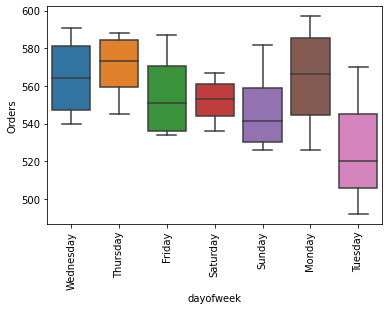

In [50]:
plt.xticks(rotation = 90)
sns.boxplot(data = numorders, x = 'dayofweek',y = 'Orders')

In [33]:
numorders.describe()

,Orders,day
count,27.000000,27.000000
mean,555.555556,14.000000
std,25.927908,7.937254
min,492.000000,1.000000
25%,536.500000,7.500000
50%,551.000000,14.000000
75%,580.000000,20.500000
max,597.000000,27.000000


# Insights

In [15]:
(df['DeliveryTime'] >= 31).value_counts()

False    14443
True       557
Name: DeliveryTime, dtype: int64

**In March, total of 557 pizzas delivered on or after 31 minutes**


**Loss Percentage = 557/15000 * 100 = 3.71**

## 95th Percentile :

In [53]:
percentile_95 = df['DeliveryTime'].quantile(q = 0.95)
print(percentile_95)
print(df['DeliveryTime'].mean())

27.0
20.088666666666665


* 20-Mar-2023 was the day with most orders : 597
* 14-Mar-2023 was the day with less orders : 492
* Average No. of pizzas sold in a day : 555
* Min. Orders on Tuesdays
* Max. Orders on Mondays


**We Can Observe that the 95th Percentile of Delivery Time is 27 Minutes, Kanav needs not to worry now, but should further decrease Delivery Time on his orders, otherwise, sooner or later he may lose the franchise 💀💀💀, So, Beware !**